# Задание 4

### Преобразование изображения
Считаем исходное изображение, приведём его к чёрнобелому формату и выполним преобразование фурье.

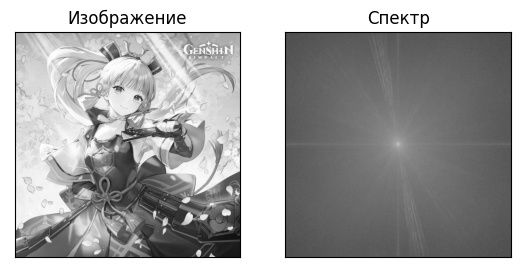

In [114]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # преобразование в чёрнобелое изображение
fshift = np.fft.fftshift(np.fft.fft2(image))  # преобразование Фурье

# Оригинальное изображение
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Изображение")
plt.xticks([])
plt.yticks([])

# Спектр
plt.subplot(122)
plt.imshow(np.log(np.abs(fshift)), cmap="gray")  # логарифмическая шкала для удобства визуального представления
plt.title("Спектр")
plt.xticks([])
plt.yticks([])

plt.show()

### Удаление основных частот
Чтобы получить контур изображения, с преобразования требуется удалить основные частоты (белое скопление в центре). Для этого занулим частоты в середине.

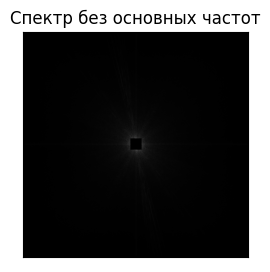

In [115]:
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
fshift[crow - 50:crow + 50, ccol - 50:ccol + 50] = 0  # удаление основных частот

# Спектр
plt.subplot(121)
plt.imshow(np.abs(fshift), cmap="gray")  # шкала не логарфмическая
plt.title("Спектр без основных частот")
plt.xticks([])
plt.yticks([])

plt.show()

### Обратное преобразование
Выполним обратное преобразование и получим контур изображения.

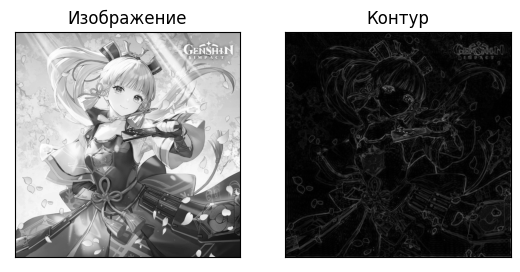

In [116]:
ishift = np.fft.ifftshift(fshift)
image_from_ifft = np.abs(np.fft.ifft2(ishift))  # обратное преобразование

# Оригинальное изображение
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Изображение")
plt.xticks([])
plt.yticks([])

# Контур
plt.subplot(122)
plt.imshow(image_from_ifft, cmap="gray")
plt.title("Контур")
plt.xticks([])
plt.yticks([])

plt.show()